# Challenge: Validating a linear regression

Statistical tests are useful for making sure a model is a good fit to the test data, and that all the features are useful to the model. However, to make sure a model has good predictive validity for new data, it is necessary to assess the performance of the model on new datasets.

The procedure is the same as with Naive Bayes classifiers – the holdout method and cross-validation method are both available. Your goal is to achieve a model with a consistent R-squared value and only statistically significant parameters across multiple samples.

Since my model to date used NY 2013 dataset, I will validate it using CA 2013 data (from the FBI:UCR website). 

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

pd.options.display.float_format = '{:,.0f}'.format

ca_crime_df = pd.read_excel('./crimes/CA_crimes.xls', header=4)
ca_crime_df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,"31,165",198,2,nan,15,52,129,886,381,372,133,17
1,Agoura Hills,"20,762",19,0,nan,2,10,7,306,109,185,12,7
2,Alameda,"76,206",158,0,nan,10,85,63,"1,902",287,"1,285",330,17
3,Albany,"19,104",29,0,nan,1,24,4,557,94,388,75,7
4,Alhambra,"84,710",163,1,nan,9,81,72,"1,774",344,"1,196",234,7


In [2]:
%%capture
%run lesson_4_project_4.ipynb

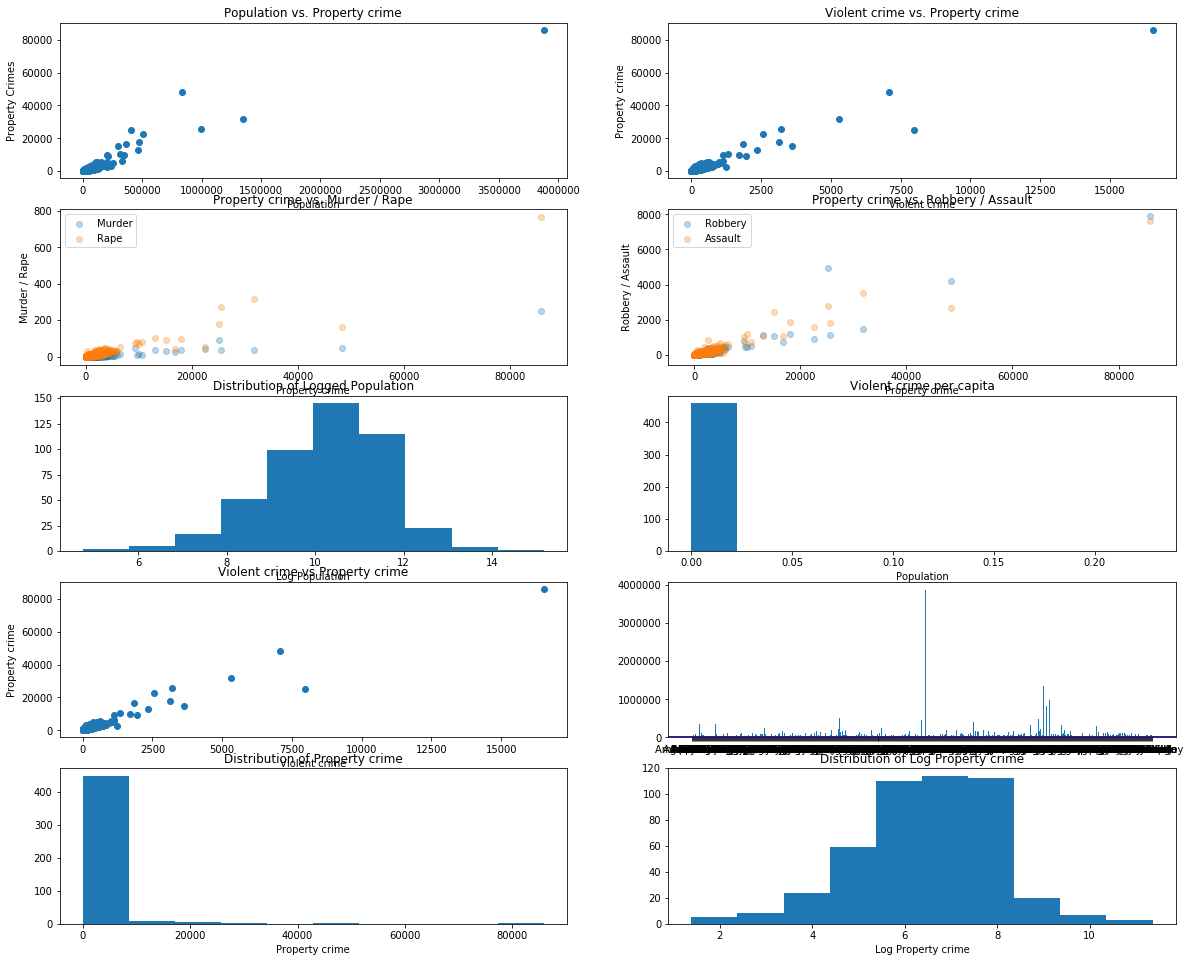

Lowest Crime Outlier: 468.0
Lowest Murder Outlier: 6.0
Lowest Rape Outlier: 28.0
Lowest Robbery Outlier: 159.0
Lowest Assault Outlier: 276.0
Lowest Population Outlier: 168144.0
Lowest Log Population Outlier: 4.74493212836
Lowest Property Crime Outlier: 4357.0


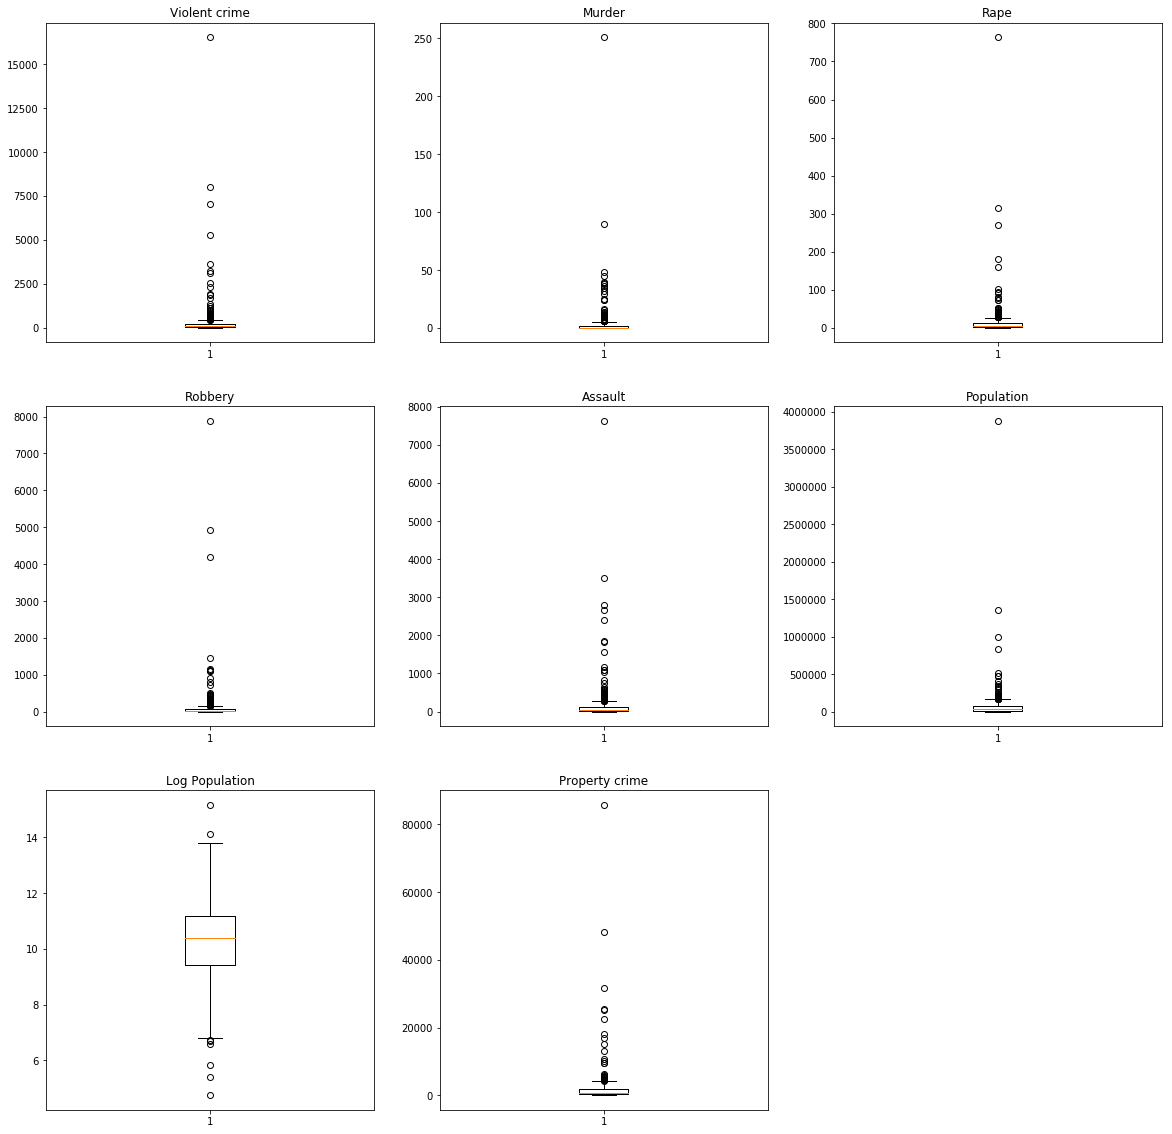

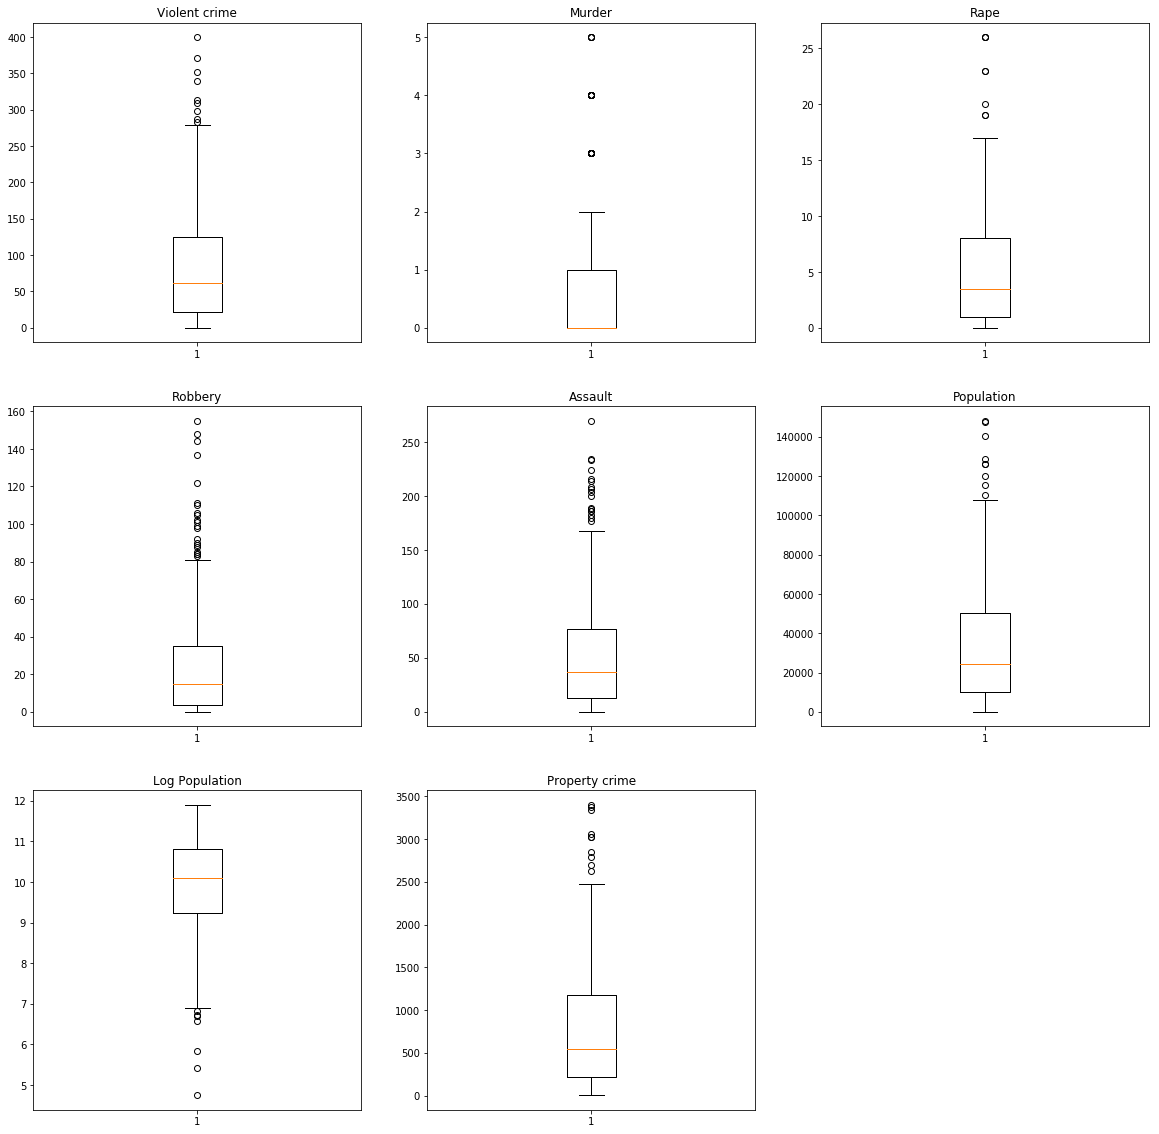

In [3]:
ca_crime_df = clean_data(ca_crime_df, 'CA')

display_relevant_plots(ca_crime_df)

ca_outliers = display_boxplots(ca_crime_df, True)
new_ca_df_without_outliers = ca_crime_df[(ca_crime_df['Population'] < ca_outliers['pop']) & (ca_crime_df['Violent crime'] < ca_outliers['violent_crime']) & (ca_crime_df['Property crime'] < ca_outliers['property_crime']) & (ca_crime_df['Murder'] < ca_outliers['murder']) & (ca_crime_df['Rape'] < ca_outliers['rape']) & (ca_crime_df['Robbery'] < ca_outliers['robbery']) & (ca_crime_df['Assault'] < ca_outliers['assault'])]
display_boxplots(new_ca_df_without_outliers, False)

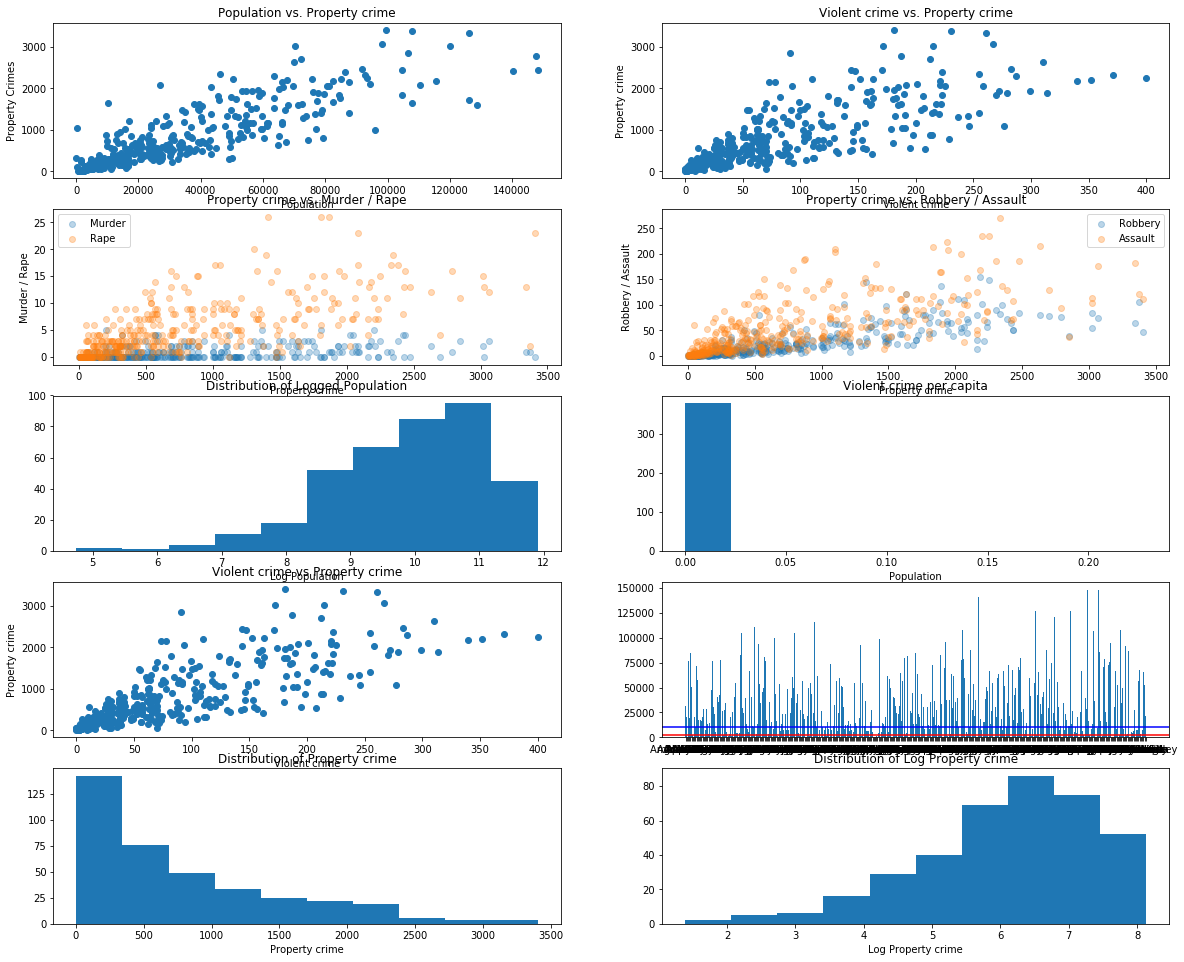

In [4]:
display_relevant_plots(new_ca_df_without_outliers)

In [14]:
ca_crime_df = new_ca_df_without_outliers
new_Y = ca_crime_df['Log Property crime'].values.reshape(-1, 1)
new_X = ca_crime_df[['Log Population', 'Violent crime', 'Robbery Categ']]
print('R-squared score: ', regr.score(new_X, new_Y))

R-squared score:  -7.07108492946


## Iterate

From the above R-squared score result, it seems like using a regression model trained on another state's data (NY) to predict anotehr state's data (CA) will not necessarily give accurate results. I will create another regression model trained and tested on CA data to get more accurate results.

In [15]:
new_regr = linear_model.LinearRegression()
new_regr.fit(new_X, new_Y)
print('R-squared score: ', new_regr.score(new_X, new_Y))

R-squared score:  0.806317745483


Second way of training a new regression model, using `linear_model` from `sklearn` below: 

In [27]:
ca_crime_df['LogPropertyCrime'] = ca_crime_df['Log Property crime']
ca_crime_df['LogPopulation'] = ca_crime_df['Log Population']
ca_crime_df['ViolentCrime'] = ca_crime_df['Violent crime']
ca_crime_df['RobberyCateg'] = ca_crime_df['Robbery Categ']

# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'LogPropertyCrime ~ LogPopulation + ViolentCrime + RobberyCateg'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=ca_crime_df).fit()
print('Params:')
print(lm.params)

print('\nP-Values:')
print(lm.pvalues)

print('\nR-squared:')
print(lm.rsquared, lm.rsquared_adj)

Params:
Intercept       -1
LogPopulation    1
ViolentCrime     0
RobberyCateg     1
dtype: float64

P-Values:
Intercept       0
LogPopulation   0
ViolentCrime    0
RobberyCateg    0
dtype: float64

R-squared:
0.806317745483 0.804772408346


In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(new_regr, new_X, new_Y, cv=3)

array([ 0.82545766,  0.75597626,  0.79721439])